<a href="https://colab.research.google.com/github/ShivaAtom/AI-Practices/blob/main/PrediccionNumeros.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras

In [ ]:
(ds_train, ds_test), info = tfds.load('mnist', split=['train','test'],as_supervised=True ,with_info=True)
print(info)

Dl Completed...:   0%|          | 0/5 [00:00<?, ? file/s]

Dataset mnist downloaded and prepared to /root/tensorflow_datasets/mnist/3.0.1. Subsequent calls will reuse this data.
tfds.core.DatasetInfo(
    name='mnist',
    full_name='mnist/3.0.1',
    description="""
    The MNIST database of handwritten digits.
    """,
    homepage='http://yann.lecun.com/exdb/mnist/',
    data_path='/root/tensorflow_datasets/mnist/3.0.1.incompleteTLXZR2',
    file_format=tfrecord,
    download_size=11.06 MiB,
    dataset_size=21.00 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{lecun2010mnist,
      title={MNIST handwritten digit database},
      author={LeCun, Yann and Cortes, Corinna and Burges, CJ},
     

In [ ]:
def make(data_set,var1, var2):
  for id, (image, label) in enumerate(data_set):
    image = tf.cast(image, tf.float32)
    var1.append(image)
    var2.append(label)

img_train, lab_train=[],[]
img_test, lab_test=[],[]

make(ds_train,img_train,lab_train)
make(ds_test, img_test, lab_test)

In [ ]:
img_train,lab_train=np.array(img_train)/255.0, np.array(lab_train)
img_test,lab_test=np.array(img_test)/255.0, np.array(lab_test)

In [ ]:
modelo = keras.Sequential([
    keras.layers.Input(shape=(28,28,1)),
    keras.layers.Conv2D(32,(3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Dropout(0.5),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])
modelo.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [ ]:
len(lab_train)
print("Comenzando entrenamiento")
his = modelo.fit(img_train,lab_train,epochs=10)
print("Finalizado")

Comenzando entrenamiento
Epoch 1/10
1875/1875 [==============================] - 19s 4ms/step - loss: 0.2634 - accuracy: 0.9187
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1149 - accuracy: 0.9649
Epoch 3/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0913 - accuracy: 0.9718
Epoch 4/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0803 - accuracy: 0.9751
Epoch 5/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0695 - accuracy: 0.9785
Epoch 6/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0632 - accuracy: 0.9803
Epoch 7/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0603 - accuracy: 0.9806
Epoch 8/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0564 - accuracy: 0.9822
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0523 - accuracy: 0.9836
Epoch 10/10
1875/1875 [==============================] -

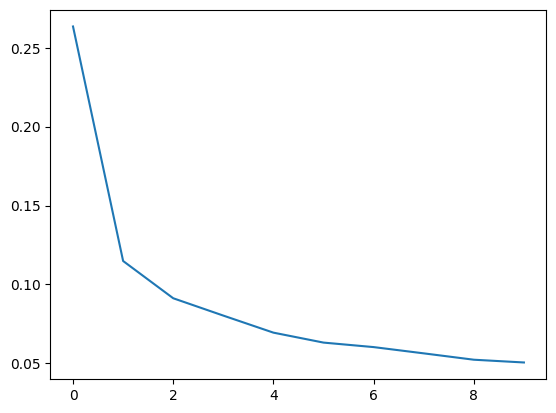

In [ ]:
plt.plot(his.history['loss'])

In [ ]:
etiqueta =['cero','uno','dos','tres','cuatr','cinco','seis','siete','osho','newe']

1/1 [==============================] - 0s 21ms/step


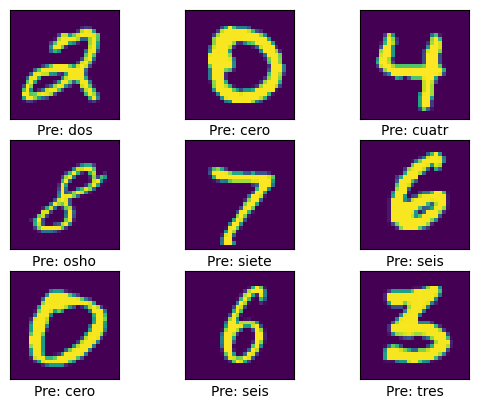

In [ ]:
pre = modelo.predict(img_test[:10])
for i in range(9):
  argMax = np.argmax(pre[i])
  plt.subplot(3,3,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(f"Pre: {etiqueta[argMax]}")
  plt.imshow(img_test[i])